## 🏡 **CFG +Masters Project: Serviced Accommodation in Essex - Analysis and Prediction**

This project dives into the world of **Serviced accommodation listings in Essex** with the goal of assisting a holiday lettings company select profitable properties to invest in based on historical Airbnb listing data. 


### 🧠 Project Objective

A holiday lettings company is on the lookout for promising properties across Essex to purchase. They are seeking data insights to select properties that can earn the highest income. 

The aims of this project are:
- identify the features that mostly correlates with occupancy rates and annual revenue
- build a machine learning model that predicts which types of properties achieves the highest occupancy rates and revenue potential. 

### 📈 The Data

The data is retrieved from real data acquired from PriceLabs (https://www.pricelabs.co), a subscription-based database often used by property investors that provides professionally managed datasets for existing and potential Airbnb businesses.

### 🛠️ Phase 1 : Data Wrangling and Exploratory Data Analysis

This first phase analysis will focus on the following:
- **Data cleaning**: To manage missing data, fixing outliers, handling duplicates etc.
- **Pre-processing and transformation**: Merging datasets, Encoding and transforming columns as needed.
- **Exploratory Data Analysis (EDA)**


### 🔍 What I'm Exploring

- **Airbnb Host features**: Reviews, professionally managed
- **Property Details**: Property type, number of bathrooms, number of occupants 
- **Amenities**: seafront, hot-tub, pets allowed, smoking allowed
- **Listing features**: Minimum length of stays, active days, blocked days


| **Category** | **Feature**         | **Description**                                         | **Data Type**          |
|--------------|---------------------|---------------------------------------------------------|------------------------|
| Property     | Number of Bedrooms  | Total number of bedrooms in the property                | Discrete Numerical     |
|              | Number of Bathrooms | Total number of bathrooms in the property               | Discrete Numerical     |
|              | Number of Guests    | Maximum number of guests allowed                        | Discrete Numerical     |
|              | Location            | Town in Essex where the property is located             | Categorical            |
| Host         | Host Ratings        | Average rating of the host                              | Continuous Numerical   |
|              | Number of Reviews   | Total number of reviews received                        | Discrete Numerical     |
| Amenities    | Seafront            | Whether the property is near the sea                    | Binary Categorical     |
|              | Hot Tub             | Availability of a hot tub                               | Binary Categorical     |
|              | Pets Allowed        | Whether pets are permitted                              | Binary Categorical     |
|              | Smoking Allowed     | Whether smoking is permitted                            | Binary Categorical     |
| Listing      | Length of Stay      | Minimum or maximum nights per stay                      | Discrete Numerical     |
|              | Active Days         | Days the listing is live and bookable                   | Discrete Numerical     |
|              | Blocked Days        | Days the listing is unavailable                         | Discrete Numerical     |
|              | Price               | Nightly price of the listing                            | Continuous Numerical   |
|              | Average Daily Rate  | How much a listing makes on average per day             | Continuous Numerical   |

#### Target Variables

| **Variable**       | **Description**                                                       | **Data Type**          |
|--------------------|-----------------------------------------------------------------------|------------------------|
| Annual Revenue      | Total income generated per listing annually                          | Continuous Numerical   |
| Occupancy Rate      | % of booked days out of total active days (Booked ÷ Active × 100)    | Continuous Numerical   |


## Import Python Modules and Data Files

In [605]:
#import libraries used for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split

In [606]:
# import data files 
airbnb_2bed = pd.read_csv("data/airbnb_essex_2bed.csv")   # please check and use your local file path
airbnb_2bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1305239269239446863,Grays,0,NaN,0,42,NaN,NaN,NaN,3,...,11,NaN,0,No,No,No,Yes,No,No,No
1,1323330681470281939,Grays,0,NaN,0,25,NaN,NaN,NaN,1,...,25,5.0,1,No,No,No,Yes,No,No,No
2,960377081653062660,Grays,0,NaN,0,314,NaN,NaN,NaN,3,...,52,4.0,1,No,No,No,Yes,No,No,No
3,1270246391535349924,Grays,0,NaN,0,83,NaN,NaN,NaN,1,...,0,NaN,0,No,No,No,Yes,No,No,No
4,660855460760807240,Grays,0,NaN,0,363,NaN,NaN,Low,4,...,3,3.0,1,No,No,No,Yes,No,No,No


In [607]:
airbnb_3bed= pd.read_csv("data/airbnb_essex_3bed.csv")  # please check and use your local file path
airbnb_3bed.head()

,listing_ID,town,est_rental_revenue_median,estimated_ADR,Est_adj_occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,Num_Reviews,beachfront,hot_tub,EV_charger,kitchen,pool,pets_allowed,smoking_allowed
0,1205963819672225857,Southend-on-Sea,0,NaN,0,151,NaN,NaN,NaN,5,...,1,0.00,0,No,No,No,Yes,No,No,No
1,870111683833490126,Southend-on-Sea,0,NaN,0,138,NaN,NaN,NaN,14,...,56,0.00,0,No,No,No,Yes,No,No,No
2,46934205,Southend-on-Sea,0,NaN,0,101,NaN,NaN,NaN,1,...,171,4.71,7,No,No,No,Yes,No,No,No
3,987440215251843897,Southend-on-Sea,0,NaN,0,187,NaN,NaN,NaN,3,...,179,4.55,0,No,No,No,Yes,No,No,No
4,1011456380483308029,Southend-on-Sea,0,NaN,0,78,NaN,NaN,High,1,...,63,NaN,0,No,No,No,Yes,No,No,No


In [608]:
#checking data of both data files

airbnb_2bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 879 non-null    int64  
 1   town                       879 non-null    object 
 2   est_rental_revenue_median  879 non-null    int64  
 3   estimated_ADR              817 non-null    float64
 4   Est_adj_occupancy          879 non-null    int64  
 5   active_days                879 non-null    int64  
 6   booking_window             817 non-null    float64
 7   length_of_stay             817 non-null    float64
 8   dynamic_pricing            470 non-null    object 
 9   min_stay                   879 non-null    int64  
 10  management                 879 non-null    object 
 11  Bedrooms                   879 non-null    int64  
 12  bathrooms                  879 non-null    float64
 13  max_guests                 879 non-null    int64  

In [609]:
airbnb_3bed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   listing_ID                 452 non-null    int64  
 1   town                       452 non-null    object 
 2   est_rental_revenue_median  452 non-null    int64  
 3   estimated_ADR              400 non-null    float64
 4   Est_adj_occupancy          452 non-null    int64  
 5   active_days                452 non-null    int64  
 6   booking_window             400 non-null    float64
 7   length_of_stay             400 non-null    float64
 8   dynamic_pricing            240 non-null    object 
 9   min_stay                   452 non-null    int64  
 10  management                 452 non-null    object 
 11  Bedrooms                   452 non-null    int64  
 12  bathrooms                  452 non-null    float64
 13  max_guests                 452 non-null    int64  

Both datasets have a 26 columns of features (i.e not including the listing IDs) which are identical.  12 of these are contain string values, the rest are numeric columns. 

In [610]:
#Combining both datasets to create one datafram: as there are the same columns, the datasets can be concatetenated. 

data = pd.concat([airbnb_2bed, airbnb_3bed], ignore_index=True)
data.shape


(1331, 27)

The dataset now as 1331 rows and 27 columns of data. 

## Standardisation. Cleaning, Pre-processing

### **Column standardisation**

In [611]:
#Checking columns of the dataset
data.columns

Index(['listing_ID', 'town', 'est_rental_revenue_median', 'estimated_ADR',
       'Est_adj_occupancy', 'active_days', 'booking_window', 'length_of_stay',
       'dynamic_pricing', 'min_stay', 'management', 'Bedrooms', 'bathrooms',
       'max_guests', 'listed_price', 'is_active', 'economic_Category',
       'blocked_days', 'rating', 'Num_Reviews', 'beachfront', 'hot_tub',
       'EV_charger', 'kitchen', 'pool', 'pets_allowed', 'smoking_allowed'],
      dtype='object')

In [612]:
#standardising column names to lowercase
data.columns = data.columns.str.lower()

print(f"Columns in dataset :{data.columns.values}")


Columns in dataset :['listing_id' 'town' 'est_rental_revenue_median' 'estimated_adr'
 'est_adj_occupancy' 'active_days' 'booking_window' 'length_of_stay'
 'dynamic_pricing' 'min_stay' 'management' 'bedrooms' 'bathrooms'
 'max_guests' 'listed_price' 'is_active' 'economic_category'
 'blocked_days' 'rating' 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger'
 'kitchen' 'pool' 'pets_allowed' 'smoking_allowed']


In [613]:
#renaming of columns for readability

data.rename(columns = {'est_rental_revenue_median': 'year_revenue', 'estimated_adr':'avg_daily_rate', 'est_adj_occupancy':'occupancy'}, inplace=True)

In [614]:
#checking change in column names
print(f"Columns in dataset :{data.columns.values}")

Columns in dataset :['listing_id' 'town' 'year_revenue' 'avg_daily_rate' 'occupancy'
 'active_days' 'booking_window' 'length_of_stay' 'dynamic_pricing'
 'min_stay' 'management' 'bedrooms' 'bathrooms' 'max_guests'
 'listed_price' 'is_active' 'economic_category' 'blocked_days' 'rating'
 'num_reviews' 'beachfront' 'hot_tub' 'ev_charger' 'kitchen' 'pool'
 'pets_allowed' 'smoking_allowed']


### **Data Cleaning**



#### Removing duplicate listings


Duplicates (based on listing_id) in the dataset can occur as one property can feature within 2 neighbourhoods. 

In [615]:
# looking at the duplicates
data[data.duplicated(subset=['listing_id'], keep=False)]

,listing_id,town,year_revenue,avg_daily_rate,occupancy,active_days,booking_window,length_of_stay,dynamic_pricing,min_stay,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,991120607387030667,Grays,92,92.39,0,366,48.0,1.0,NaN,1,...,0,0.00,0,No,No,No,Yes,No,No,No
24,1339734188104641921,Grays,689,86.08,15,54,7.0,6.0,NaN,2,...,58,NaN,0,No,No,No,Yes,No,No,No
32,1029075368162869978,Grays,1398,93.19,19,79,14.0,4.0,NaN,3,...,281,NaN,0,No,No,No,Yes,No,No,No
34,1313627075795796786,Grays,1805,75.21,44,55,37.0,7.0,NaN,4,...,93,NaN,0,No,No,No,Yes,No,No,No
38,1339093830414323513,Grays,2025,84.36,42,57,5.0,5.0,Low,1,...,39,NaN,0,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,867428043609660988,Brentwood,0,NaN,0,180,NaN,NaN,NaN,7,...,186,0.00,0,No,No,No,Yes,No,Yes,No
1179,809501303830183077,Brentwood,7775,97.19,71,112,26.0,43.0,NaN,2,...,194,5.00,4,No,No,No,Yes,No,No,No
1180,725823036821709871,Brentwood,7859,145.54,15,363,42.0,5.0,NaN,2,...,3,3.83,6,No,No,No,Yes,No,No,No
1190,872913740243580186,Brentwood,51017,147.45,98,352,75.0,18.0,NaN,1,...,14,5.00,23,No,No,Yes,Yes,No,No,No


In [616]:
#dropping any duplicates, keeping the first occurence
data = data.drop_duplicates(subset='listing_id', keep='first')

In [617]:
#checking the remaining data after dropping duplicates
data.shape

(1236, 27)

There are now a total of 1236 rows of data

#### Remove irrelevant columns

One of the primary use of PriceLabs data is for agents and airbnb owners to determine listing prices. The columns "booking window" and "dynamic pricing" are used to determine this as is not relevant to our analysis. These columns/ features are excluded from our study. 

In [618]:
data.drop(columns=['listing_id','booking_window','dynamic_pricing'],inplace=True )

#### **Missing and Zero Values**

<Axes: title={'center': 'Heatmap of Missing Values'}>

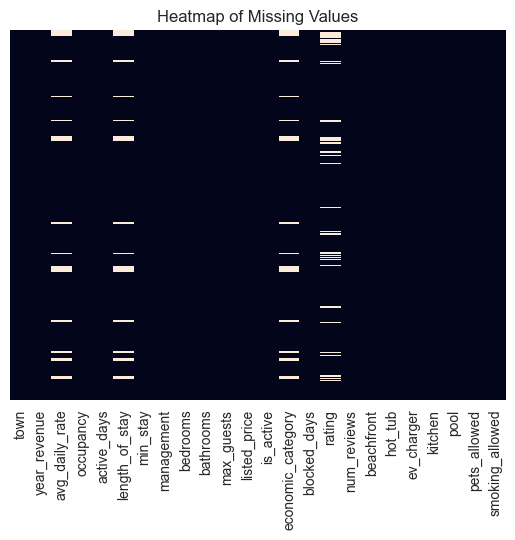

In [619]:
#analyising patterns and distributions of missing values in the data using a heatmap
plt.title('Heatmap of Missing Values')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [620]:
print("Columns with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Columns with missing values are:
avg_daily_rate       110
length_of_stay       110
economic_category    110
rating               144
dtype: int64


It also appears that there are exactly the same number of missing values (110) for 3 columns - avg_daily_rate, length_of_stay and economic_category, appearing along the same rows (listings).

In [621]:
# analysing these rows further, checking the values for target variables occupancy and annual revenue

mask = data[['avg_daily_rate', 'length_of_stay', 'economic_category']].isnull().all(axis=1)

In [622]:
data[mask][['occupancy', 'year_revenue']].describe()

,occupancy,year_revenue
count,110.0,110.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


This table confirms that these 110 rows also do not contain data for rental revenue and occupancy which suggests either the properties did not have rental data available or were not rented out during the preceeed 365 days. These rows will therefore be excluded from the study. 

In [623]:
#exploring zero values for target variable 
data[(data['year_revenue'] == 0)]

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
0,Grays,0,NaN,0,42,NaN,3,Small,2,2.0,...,11,NaN,0,No,No,No,Yes,No,No,No
1,Grays,0,NaN,0,25,NaN,1,Small,2,2.0,...,25,5.0,1,No,No,No,Yes,No,No,No
2,Grays,0,NaN,0,314,NaN,3,Individual,2,2.5,...,52,4.0,1,No,No,No,Yes,No,No,No
3,Grays,0,NaN,0,83,NaN,1,Individual,2,1.0,...,0,NaN,0,No,No,No,Yes,No,No,No
4,Grays,0,NaN,0,363,NaN,4,Small,2,1.5,...,3,3.0,1,No,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,Grays,0,NaN,0,94,NaN,1,Small,3,3.0,...,76,0.0,0,No,No,No,Yes,No,No,No
1256,Grays,0,NaN,0,52,NaN,1,Large,3,1.0,...,35,3.5,0,No,No,No,Yes,No,No,No
1257,Grays,0,NaN,0,183,NaN,3,Large,3,1.5,...,183,NaN,0,No,No,No,Yes,No,Yes,No
1258,Grays,0,NaN,0,127,NaN,3,Large,3,2.0,...,187,4.5,0,No,No,No,Yes,No,No,No


In [624]:
# selecting rows where revenue is not equals to 0. 
data = data[data['year_revenue'] != 0]
data.head(5)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.00,0,No,No,No,Yes,No,No,No
21,Grays,567,113.31,4,136,5.0,4,Moderate,2,1.0,...,3,NaN,0,No,No,No,Yes,No,Yes,No
22,Grays,597,119.41,10,49,5.0,1,Large,2,2.0,...,96,4.42,0,No,No,No,Yes,No,No,No
23,Grays,627,156.73,13,30,4.0,2,Moderate,2,2.0,...,43,5.00,4,No,No,No,Yes,No,No,No
24,Grays,689,86.08,15,54,6.0,2,Large,2,1.0,...,58,NaN,0,No,No,No,Yes,No,No,No


In [625]:
#checking for other anomaliesa
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1029.000000,1126.000000
mean,14183.282416,111.085444,58.397869,219.482238,11.089698,3.057726,2.351687,1.431616,5.022202,136.517762,67.636767,4.583703,26.719361
std,11384.073480,50.895556,26.713322,98.945584,8.887841,5.232144,0.477709,0.562324,1.349385,65.237925,64.608389,0.876289,48.672669
min,66.000000,24.570000,0.000000,17.000000,1.000000,1.000000,2.000000,0.000000,2.000000,28.000000,0.000000,0.000000,0.000000
25%,5385.250000,82.625000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.250000,16.000000,4.610000,2.000000
50%,11957.000000,101.125000,63.000000,229.500000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19980.750000,125.387500,79.000000,310.000000,15.750000,3.000000,3.000000,2.000000,6.000000,154.750000,102.000000,5.000000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


In [626]:
#looking for zero values in occupancy

occupancy_zero = data[data['occupancy'] == 0]
occupancy_zero

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
20,Grays,92,92.39,0,366,1.0,1,Individual,2,1.0,...,0,0.0,0,No,No,No,Yes,No,No,No
1199,Clacton-on-Sea,89,88.83,0,256,1.0,2,Individual,3,1.5,...,110,0.0,0,No,No,No,Yes,Yes,Yes,Yes


There is only 2 rows showing 0 occupancy rate. Both also have **ratings** of zero which may suggest either data anomaly, or these are newly listed properties without historical data. These rows will be removed. 

In [627]:
data = data[data['occupancy'] != 0].copy()

#### **Managing Ratings Values**

In [628]:
# checking for missing values
print("Remaining column with missing values are:")
print(data.isnull().sum()[data.isnull().sum() > 0])

Remaining column with missing values are:
rating    97
dtype: int64


Now the only column left with missing values is the 'Rating' column with 97 missing values. 

In [629]:
#Checking Ratings = 0

zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
40,Grays,2620,58.23,68,66,17.0,2,Unknown,2,1.0,...,58,0.0,0,No,No,No,Yes,No,Yes,No
57,Grays,8163,74.21,97,113,18.0,10,Individual,2,2.0,...,253,0.0,0,No,No,No,Yes,No,No,No
71,Grays,11990,92.94,53,242,4.0,2,Small,2,1.0,...,60,0.0,0,No,No,No,Yes,No,No,No
108,Southend-on-Sea,700,116.64,2,359,1.0,1,Individual,2,1.0,...,7,0.0,0,No,No,No,Yes,No,No,No
110,Southend-on-Sea,811,135.19,5,111,18.0,3,Small,2,1.0,...,9,0.0,0,No,No,No,Yes,No,No,No
112,Southend-on-Sea,1471,98.10,5,294,2.0,1,Small,2,1.0,...,72,0.0,0,No,Yes,No,Yes,No,No,No
136,Southend-on-Sea,4651,35.78,55,237,5.0,1,Individual,2,1.0,...,129,0.0,0,No,No,No,Yes,No,No,No
251,Chelmsford,4211,100.27,44,95,36.0,3,Individual,2,1.0,...,114,0.0,0,No,No,No,Yes,No,Yes,Yes
292,Chelmsford,19583,264.64,95,78,2.0,5,Small,2,1.0,...,288,0.0,0,No,No,No,Yes,No,No,No
349,Brentwood,6460,86.13,90,83,12.0,7,Individual,2,1.0,...,155,0.0,0,No,No,No,Yes,No,Yes,No


There are 23 rows where ratings = 0.

In [630]:
#checking if there are any invalid rating values (i.e  >5)
over_five = data[data["rating"] > 5]
over_five

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


In [631]:
# replacing problematic values for 'rating'

valid_ratings = data["rating"][(data["rating"] >= 1)]

In [633]:
#calculating median, and replacing NaNs and zeros with the median rating
median_rating=valid_ratings.median()
data["rating"] = data["rating"].apply(lambda x: median_rating if pd.isna(x) or x == 0 else x)


In [634]:
#checking if this has resolved zero rating
zero_rating= data[data['rating'] == 0]
zero_rating

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed


<Axes: title={'center': 'Missing Values (after data cleaning)'}>

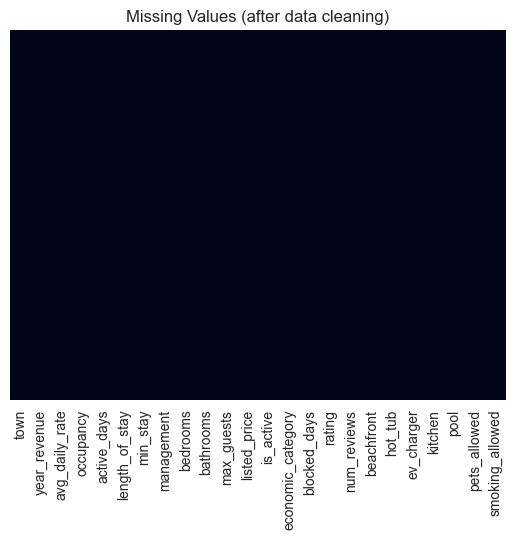

In [635]:
#checking effectiveness of removing null values in the dataset.
plt.title('Missing Values (after data cleaning)')
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

Checking missing values on the dataset using a heatmap - shows that there are no longer missing/NaN values in the dataset.

#### **Zero Values - Bathroom**

In [636]:
zero_bathroom= data[data['bathrooms'] == 0]
zero_bathroom

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
259,Chelmsford,7969,122.60,31,213,9.0,1,Individual,2,0.0,...,153,4.96,24,No,No,No,Yes,No,No,No
391,Brentwood,27524,108.36,71,359,19.0,1,Small,2,0.0,...,7,4.64,42,No,No,No,Yes,No,No,No
468,Colchester,7011,56.09,60,208,22.0,2,Small,2,0.0,...,78,5.00,4,No,No,Yes,Yes,No,No,No
1212,Clacton-on-Sea,2952,105.43,13,212,4.0,2,Individual,3,0.0,...,145,4.57,7,No,No,No,Yes,No,Yes,No


There are 4 row with 0 bathrooms

In [637]:
print(data['bathrooms'].value_counts())

bathrooms
1.0    603
2.0    248
1.5    180
2.5     60
3.0     25
0.0      4
4.0      3
3.5      1
Name: count, dtype: int64


As there are only 4 listings without bathrooms, we have decided to use the mode (most frequently occuring value) to replace the zero values as it is assumed that these properties are most likely to have this number of bathrooms. 

In [638]:
bathroom_mode = data['bathrooms'].mode()[0]
print("Mode of bathrooms:", bathroom_mode)

Mode of bathrooms: 1.0


In [639]:
#Replace zero values with the mode
data['bathrooms'] = data['bathrooms'].replace(0, bathroom_mode)
print(data['bathrooms'].value_counts()) # checking if zero values are now replaced

bathrooms
1.0    607
2.0    248
1.5    180
2.5     60
3.0     25
4.0      3
3.5      1
Name: count, dtype: int64


### Outlier management 

In [640]:
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000,1124.000000
mean,14208.358541,111.121877,58.501779,219.319395,11.107651,3.060498,2.351423,1.435498,5.020463,136.580961,67.659253,4.715151,26.766904
std,11378.646570,50.933460,26.623074,98.930957,8.885538,5.236345,0.477627,0.556731,1.347313,65.272739,64.622022,0.475457,48.702917
min,66.000000,24.570000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,28.000000,0.000000,1.000000,0.000000
25%,5424.250000,82.605000,41.000000,132.000000,4.000000,2.000000,2.000000,1.000000,4.000000,99.750000,16.000000,4.680000,2.000000
50%,11969.500000,101.165000,63.000000,229.000000,8.000000,2.000000,2.000000,1.000000,5.000000,124.000000,47.000000,4.860000,8.000000
75%,19984.000000,125.407500,79.000000,310.000000,16.000000,3.000000,3.000000,2.000000,6.000000,155.000000,102.000000,4.990000,27.000000
max,82579.000000,719.980000,100.000000,366.000000,59.000000,90.000000,3.000000,4.000000,11.000000,955.000000,324.000000,5.000000,431.000000


Outliers in this study could be caused by the following:

Our target variables for this study are annual revenue (**year_revenue**) and occupancy rate (**occupancy**), the rest are independent variables ('features') for this study. There is a signicant difference between the max value and the 75th percentiles for both these values which suggest possible outliers or data anomalies which will need further analysis 

Within the features, there are also larger at expected intervals between 75th percentile and max values for the following: **avg_daily_rate**, **length_of_stay**, **min_stay**, **listed_price**, **blocked_days**, **num_reviews**. These will also be looked at more closely to determine if these are possible data errors or listing errors.

A minimum occupancy of 0 and min revenue of £66 are contradictory. Zero minimum values for **bathrooms** and **ratings** also need further investigation as neither of these can contain zero values

#### **Visualising Outliers with Boxplots**

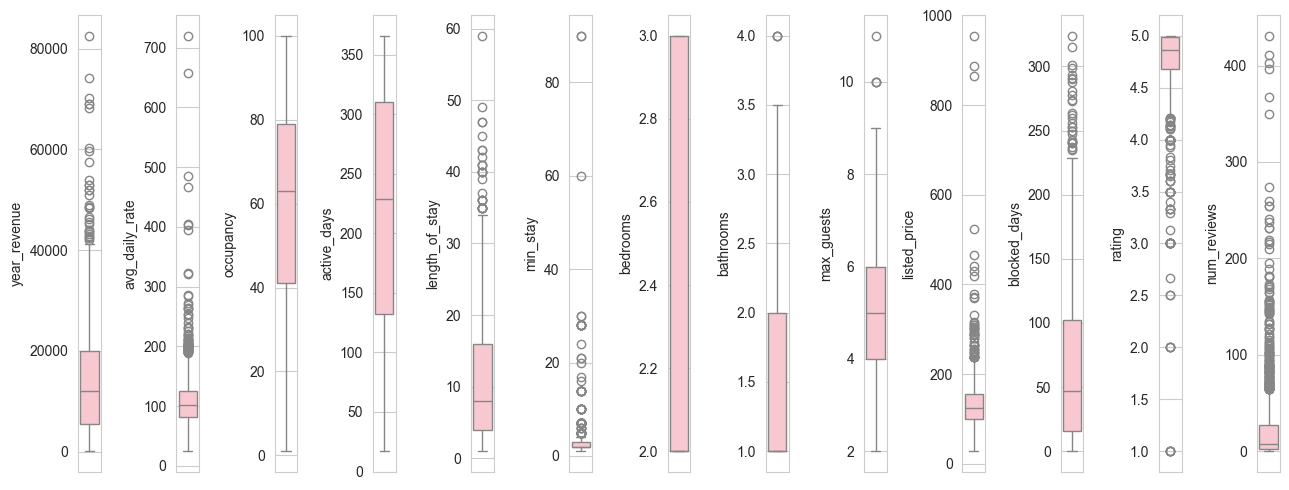

In [641]:
# Get numeric columns only, excluding 'listing_id'
numeric_cols = data.select_dtypes(include='number').columns
l = numeric_cols.values
# Set number of plots per row (columns of the figure grid)
number_of_columns = len(l)
number_of_rows=1

plt.figure(figsize=(number_of_columns, 5*number_of_rows))

for i, col in enumerate(l):
    plt.subplot(number_of_rows, number_of_columns, i + 1)
    sns.set_style('whitegrid')
    sns.boxplot(data=data[col], color='pink', orient='v')
    
    plt.tight_layout()

plt.show()

Boxplots display the median, interquartile range (IQR) and any data points that fall outside of 1.5 *IQR from the lower or uppoer quartiles(shown as circles). 

Observations:
 1. year_revenue and avg_daily_rate, listed price: 
 Both variables exhibit several high-value outliers, likely representing luxury or premium listings. These extreme values can disproportionately influence regression models. To address this, transformation techniques such as log-scaling or capping via winsorization may be necessary.

 2. min_stay, blocked_days
These features contain notable outliers, including unusually long stay requirements and listings blocked for most of the year. Such anomalies may not reflect typical booking behaviour and could distort model outcomes or reduce predictive reliability. Removing or adjusting these entries may improve data quality and model performance. 

 


#### Using Winsorization

In [642]:
#Using winsorization for outlier management
winsor_cols = ['year_revenue', 'avg_daily_rate', 'listed_price']

for col in winsor_cols:
    data[col] = winsorize(data[col], limits=[0.01, 0.01])

#### Using Threshold caps

In [643]:
# Using threshold caps 
#min stay for serviced accommodation  set at 7 days

min_stay_count = data[data['min_stay'] > 7].shape[0]
print(f"Listings with min_stay > 7 days: {min_stay_count}")

Listings with min_stay > 7 days: 39


In [644]:
#min blocked days - 225 days
blocked_days_count = data[data['blocked_days'] > 225].shape[0]
print(f"Listings with blocked_days > 225 days: {blocked_days_count}")

Listings with blocked_days > 225 days: 33


In [645]:
data_filtered = data[(data['min_stay'] <= 7) & (data['blocked_days'] <= 225)]

In [646]:
print(f"Original dataset size: {data.shape[0]}")
print(f"Filtered dataset size: {data_filtered.shape[0]}")

Original dataset size: 1124
Filtered dataset size: 1054


In [647]:
data = data_filtered


In [648]:
data.describe()

,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,bedrooms,bathrooms,max_guests,listed_price,blocked_days,rating,num_reviews
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,14437.970588,110.416746,58.422201,223.360531,10.618596,2.355787,2.362429,1.438805,5.047438,134.805503,61.523719,4.713814,27.374763
std,10975.175865,40.724808,26.432755,98.208855,8.366185,1.375260,0.480930,0.562607,1.338178,49.073787,55.601220,0.470203,48.531688
min,267.000000,47.210000,1.000000,17.000000,1.000000,1.000000,2.000000,1.000000,2.000000,58.000000,0.000000,1.000000,0.000000
25%,5634.250000,82.815000,41.000000,138.250000,4.000000,1.000000,2.000000,1.000000,4.000000,100.000000,16.000000,4.670000,2.000000
50%,12490.500000,101.940000,63.000000,234.000000,8.000000,2.000000,2.000000,1.000000,5.000000,125.000000,43.000000,4.860000,9.000000
75%,20623.500000,125.982500,78.000000,313.000000,14.000000,3.000000,3.000000,2.000000,6.000000,155.000000,96.000000,4.980000,28.000000
max,52944.000000,272.970000,100.000000,366.000000,59.000000,7.000000,3.000000,4.000000,11.000000,331.000000,225.000000,5.000000,431.000000


## **Data Pre-processing** 

In [649]:
# examining columns with categorical data

categorical_cols = [
    'town', 'management', 'is_active', 'economic_category',
    'beachfront', 'hot_tub', 'ev_charger', 'kitchen',
    'pool', 'pets_allowed', 'smoking_allowed'
]

# Summary info for each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(dropna=False))
    print(f"Unique Values: {data[col].nunique()}")


Column: town
town
Colchester         295
Southend-on-Sea    216
Clacton-on-Sea     142
Grays              118
Chelmsford         114
Brentwood           64
Walton-on-Naze      59
Saffron-Walden      46
Name: count, dtype: int64
Unique Values: 8

Column: management
management
Small         371
Individual    361
Moderate      175
Large         137
Unknown        10
Name: count, dtype: int64
Unique Values: 5

Column: is_active
is_active
Yes    770
No     284
Name: count, dtype: int64
Unique Values: 2

Column: economic_category
economic_category
Midscale    631
Upscale     320
Economy     103
Name: count, dtype: int64
Unique Values: 3

Column: beachfront
beachfront
No     1048
Yes       6
Name: count, dtype: int64
Unique Values: 2

Column: hot_tub
hot_tub
No     1011
Yes      43
Name: count, dtype: int64
Unique Values: 2

Column: ev_charger
ev_charger
No     1034
Yes      20
Name: count, dtype: int64
Unique Values: 2

Column: kitchen
kitchen
Yes    1023
No       31
Name: count, dtype: int

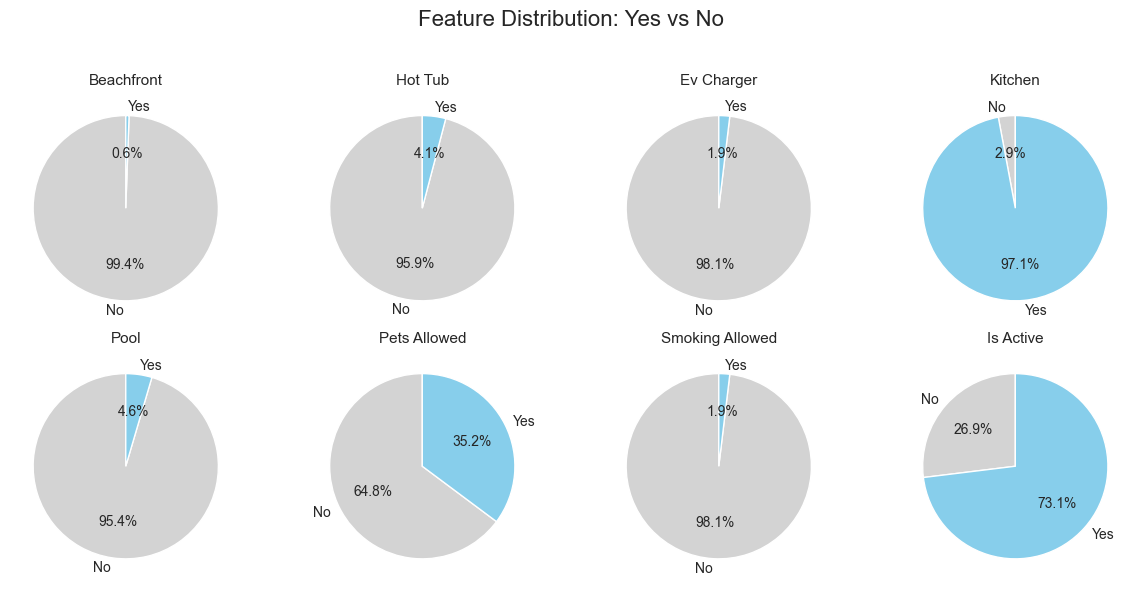

In [651]:
binary_features = {
    'beachfront': [1048, 6],
    'hot_tub': [1011, 43],
    'ev_charger': [1034, 20],
    'kitchen': [31, 1023],
    'pool': [1006, 48],
    'pets_allowed': [683, 371],
    'smoking_allowed': [1034, 20],
    'is_active': [284, 770]
}

labels = ['No', 'Yes']
colors = ['lightgrey', 'skyblue']

# Set up subplot grid
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, (feature, values) in enumerate(binary_features.items()):
    ax = axes[i]
    ax.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    ax.set_title(feature.replace('_', ' ').title(), fontsize=11)

# Adjust layout
plt.suptitle('Feature Distribution: Yes vs No', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [555]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 20 to 1330
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town               1056 non-null   int64  
 1   year_revenue       1056 non-null   int64  
 2   avg_daily_rate     1056 non-null   float64
 3   occupancy          1056 non-null   int64  
 4   active_days        1056 non-null   int64  
 5   length_of_stay     1056 non-null   float64
 6   min_stay           1056 non-null   int64  
 7   management         1056 non-null   int64  
 8   bedrooms           1056 non-null   int64  
 9   bathrooms          1056 non-null   float64
 10  max_guests         1056 non-null   int64  
 11  listed_price       1056 non-null   int64  
 12  is_active          1056 non-null   int64  
 13  economic_category  1056 non-null   int64  
 14  blocked_days       1056 non-null   int64  
 15  rating             1056 non-null   float64
 16  num_reviews        1056 non-

## **Exploratory Data Analysis**

### Revenue

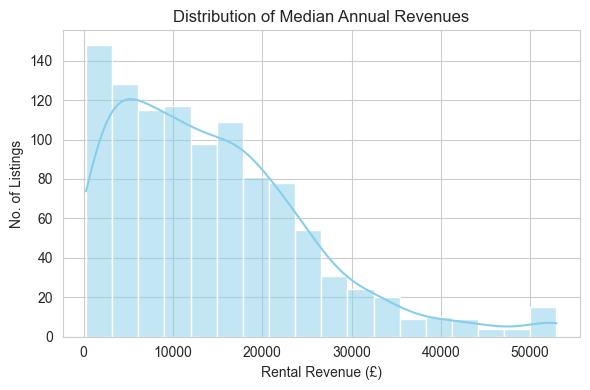

In [653]:
#Visualising distributions col = 'est_rental_revenue_median'

plt.figure(figsize=(6, 4))  

sns.histplot(x=data['year_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Median Annual Revenues')
plt.xlabel('Rental Revenue (£)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [654]:
# looking at the top 10 listings with highest revenues: 
data[data['year_revenue']>40000].sort_values(by='year_revenue', ascending=False).head(10)

,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,blocked_days,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed
623,Colchester,52944,201.33,100,350,7.0,2,Large,2,2.0,...,16,5.00,6,No,No,No,Yes,No,No,No
622,Colchester,52944,192.79,99,313,6.0,1,Large,2,1.5,...,49,5.00,3,No,Yes,No,Yes,No,Yes,No
621,Colchester,52944,147.57,100,366,5.0,3,Small,2,2.0,...,0,5.00,4,No,Yes,No,Yes,No,Yes,No
620,Colchester,52944,272.97,95,138,3.0,2,Large,2,1.0,...,6,4.67,3,No,Yes,No,Yes,No,Yes,No
1161,Colchester,52944,210.89,95,286,2.0,1,Large,3,2.0,...,80,5.00,4,No,No,No,Yes,No,Yes,No
1162,Colchester,52944,231.36,98,304,5.0,2,Large,3,3.0,...,62,5.00,1,No,No,No,Yes,No,Yes,No
1160,Colchester,52944,177.78,91,326,5.0,2,Individual,3,2.0,...,40,4.85,144,No,No,No,Yes,No,Yes,No
1307,Grays,52944,272.97,70,366,2.0,1,Individual,3,1.5,...,0,4.86,0,No,No,No,Yes,No,No,Yes
680,Saffron-Walden,52944,188.33,100,362,5.0,3,Moderate,2,1.0,...,4,5.00,4,No,No,No,Yes,No,Yes,No
681,Saffron-Walden,52944,272.97,61,354,2.0,2,Small,2,2.5,...,12,5.00,11,No,Yes,Yes,Yes,No,No,No


It can be observed that properties with high revenue have relatively high average daily rates and occupancies (above 70%). This may suggest  that these outliers may be genuine high performing properties.


In [656]:
low_rev = data[data['year_revenue'] < 12500]
high_rev = data[data['year_revenue'] >= 12500]

print(f"{len(high_rev)} listings are at 50th percentile of revenue (threshold = £12500)")

526 listings are at 50th percentile of revenue (threshold = £12500)


In [657]:
#creating a comparison table of features from low vs high revenue

summary = pd.DataFrame({
    'Low Revenue (<12500)':low_rev.mean(numeric_only=True),
    'High Revenue (≥12500)': high_rev.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Revenue (<12500),High Revenue (≥12500)
year_revenue,5956.09,22952.10
avg_daily_rate,101.54,119.33
occupancy,45.00,71.90
active_days,163.48,283.46
length_of_stay,10.81,10.42
min_stay,2.37,2.34
bedrooms,2.36,2.37
bathrooms,1.39,1.49
max_guests,4.97,5.12
listed_price,125.57,144.08


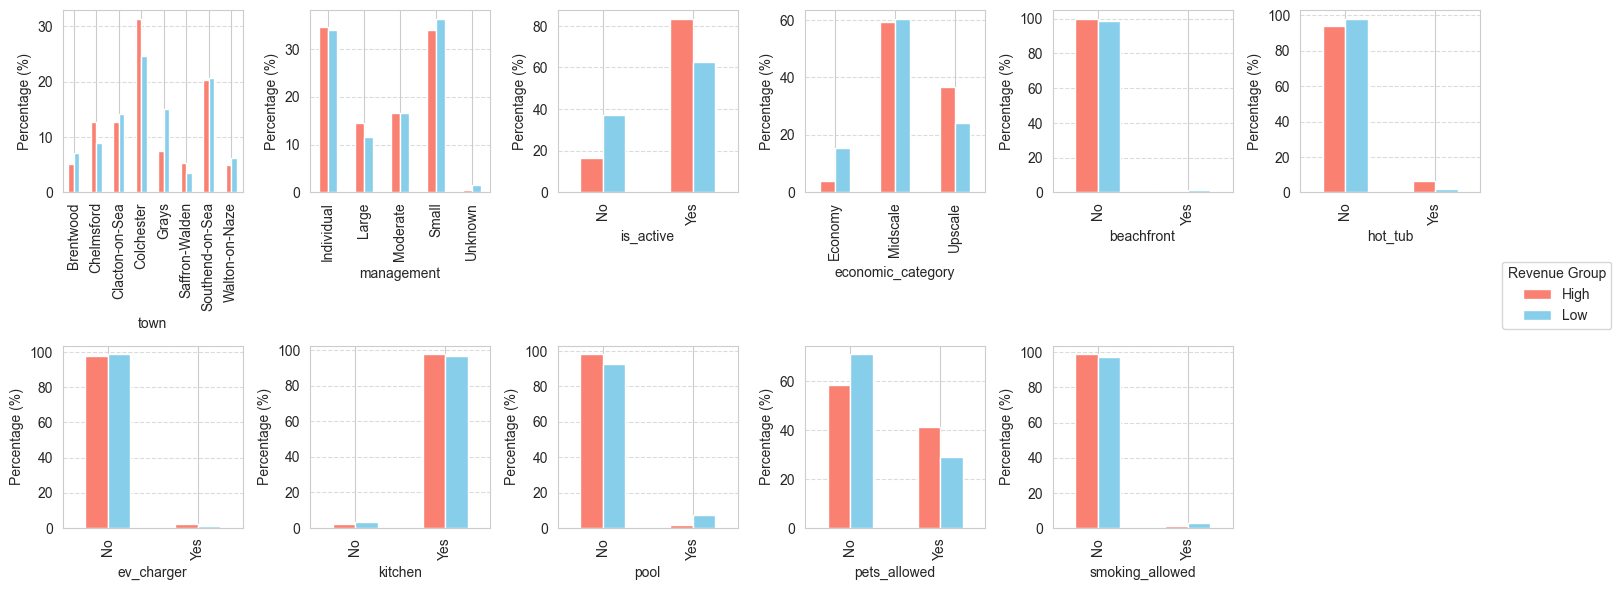

In [658]:
threshold = 12500
data['revenue_group'] = data['year_revenue'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['revenue_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)

 
    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Revenue Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher revenues are associated with:
- Chelmsford and Colchester areas
- Management by larger organisations
- Active listings
- Upscale economic category
- Availability of a hot tub
- Availability of EV charger
- No pool
- Pets allowed
- No smoking

It is however important to note that due to the imbalance of the data, it would be difficult to determine significance in these relationships. 

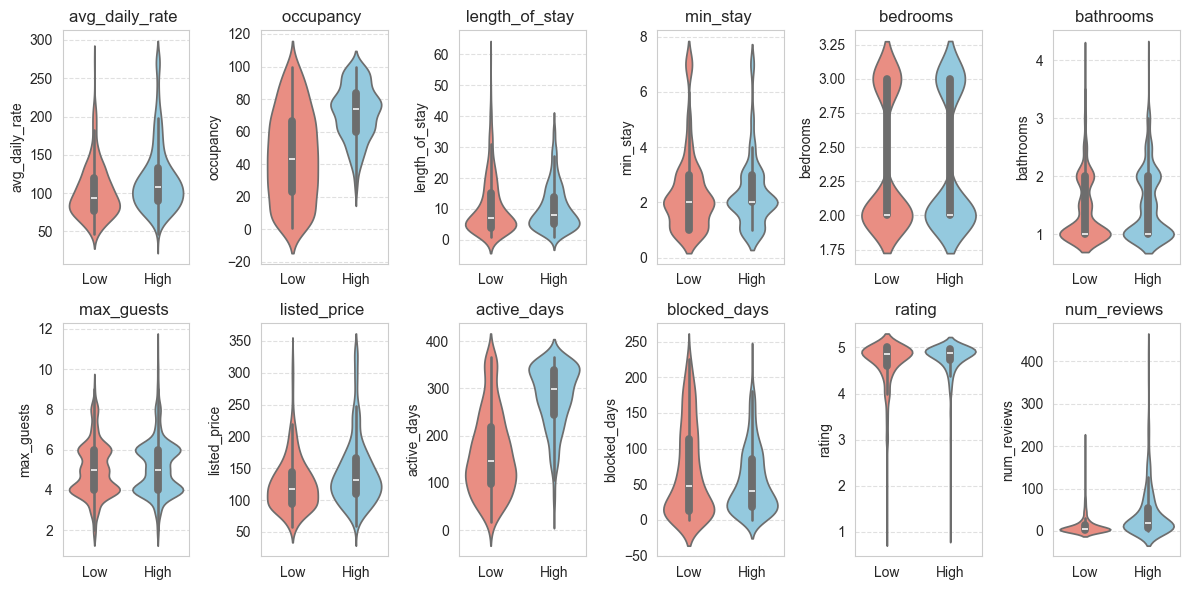

In [659]:
numerical_cols = [
    'avg_daily_rate', 'occupancy', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(x='revenue_group', y=col, data=data, ax=axes[i], hue='revenue_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



Observations for higher revenue yielding properties:
- higher average daily rate
- higher occupancy
- higher number of active days
- lower length of stay
- higher listed price
- less blocked days
- higher number of reviews


### Occupancy

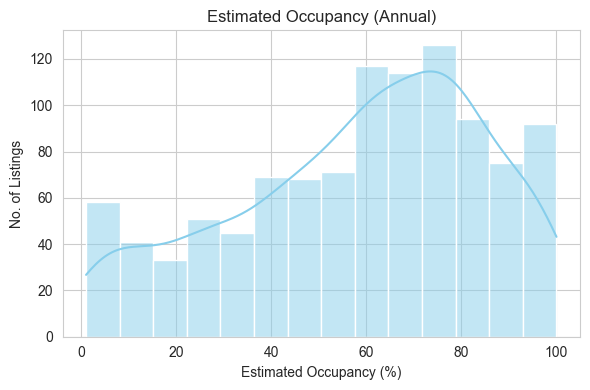

In [660]:
plt.figure(figsize=(6, 4))  

sns.histplot(x=data['occupancy'], kde=True, color='skyblue')
plt.title('Estimated Occupancy (Annual)')
plt.xlabel('Estimated Occupancy (%)')
plt.ylabel('No. of Listings')

plt.tight_layout()
plt.show()

In [661]:
data['occupancy'].describe()

count    1054.000000
mean       58.422201
std        26.432755
min         1.000000
25%        41.000000
50%        63.000000
75%        78.000000
max       100.000000
Name: occupancy, dtype: float64

In [662]:
# analysing low occupancy listings. 
low_occupancy_threshold = 60
low_occupancy = data[data['occupancy'] < low_occupancy_threshold]

print(f"{len(low_occupancy)} listings have occupancy < {low_occupancy_threshold}%")
display(low_occupancy.sort_values(by='occupancy'))

473 listings have occupancy < 60%


,town,year_revenue,avg_daily_rate,occupancy,active_days,length_of_stay,min_stay,management,bedrooms,bathrooms,...,rating,num_reviews,beachfront,hot_tub,ev_charger,kitchen,pool,pets_allowed,smoking_allowed,revenue_group
798,Walton-on-Naze,267,182.71,1,69,1.0,1,Small,2,1.0,...,4.86,1,No,No,No,Yes,No,Yes,No,Low
799,Walton-on-Naze,376,75.23,1,361,5.0,3,Individual,2,1.5,...,4.50,10,No,No,No,Yes,Yes,Yes,No,Low
1260,Grays,267,108.68,1,164,1.0,1,Small,3,1.0,...,4.33,6,No,No,No,Yes,No,No,No,Low
899,Southend-on-Sea,267,133.46,1,190,1.0,1,Individual,3,1.0,...,5.00,1,No,No,No,Yes,No,No,No,Low
900,Southend-on-Sea,428,213.88,1,184,2.0,2,Individual,3,1.0,...,4.86,0,No,No,No,Yes,No,No,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Southend-on-Sea,51839,272.97,59,122,2.0,1,Individual,2,2.5,...,4.86,1,No,Yes,No,Yes,No,No,No,High
212,Southend-on-Sea,19101,103.81,59,314,9.0,2,Individual,2,2.0,...,4.95,40,No,No,No,Yes,No,No,No,High
1187,Brentwood,28409,143.48,59,334,5.0,2,Individual,3,1.0,...,4.74,82,No,No,No,Yes,No,No,No,High
311,Chelmsford,27163,129.97,59,354,18.0,3,Moderate,2,1.0,...,5.00,2,No,No,No,Yes,No,Yes,No,High


In [663]:
low_occ = data[data['occupancy'] < 60]
high_occ = data[data['occupancy'] >= 60]


In [664]:
summary = pd.DataFrame({
    'Low Occupancy (<60%)':low_occ.mean(numeric_only=True),
    'High Occupancy (≥60%)': high_occ.mean(numeric_only=True)
})
display(summary.style.format("{:.2f}"))

,Low Occupancy (<60%),High Occupancy (≥60%)
year_revenue,8520.01,19255.86
avg_daily_rate,112.60,108.64
occupancy,34.10,78.23
active_days,213.98,231.00
length_of_stay,8.63,12.24
min_stay,2.30,2.40
bedrooms,2.41,2.33
bathrooms,1.45,1.43
max_guests,5.18,4.94
listed_price,137.77,132.40


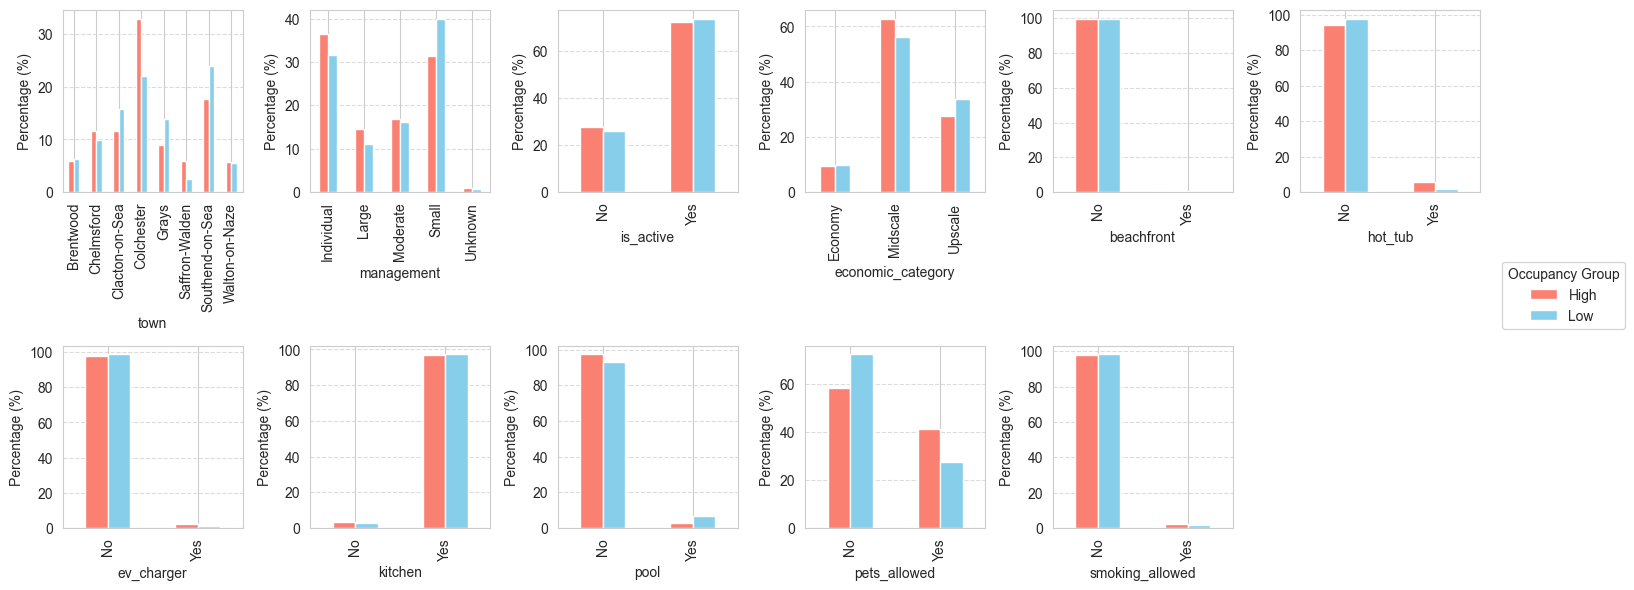

In [665]:
# visualising categorical features 

threshold = 60
data['occupancy_group'] = data['occupancy'].apply(
    lambda x: 'High' if x >= threshold else 'Low'
)
n_cols = 6
n_rows = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Plot bar charts
for i, col in enumerate(categorical_cols):
    group_dist = pd.crosstab(data[col], data['occupancy_group'], normalize='columns') * 100
    group_dist = group_dist.round(2)
    group_dist.plot(kind='bar', ax=axes[i], color=['salmon', 'skyblue'], legend=False)

 
    axes[i].set_ylabel('Percentage (%)')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.0, 0.5), title='Occupancy Group')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher occupancy appears to be accociated with the following categorical data:
- Chemlsford and Colchester
- Economic Cateogory: Midscalte
- Management: Individuals or large companies
- Availabilty of a hot tub
- No pool
- Pets allowed

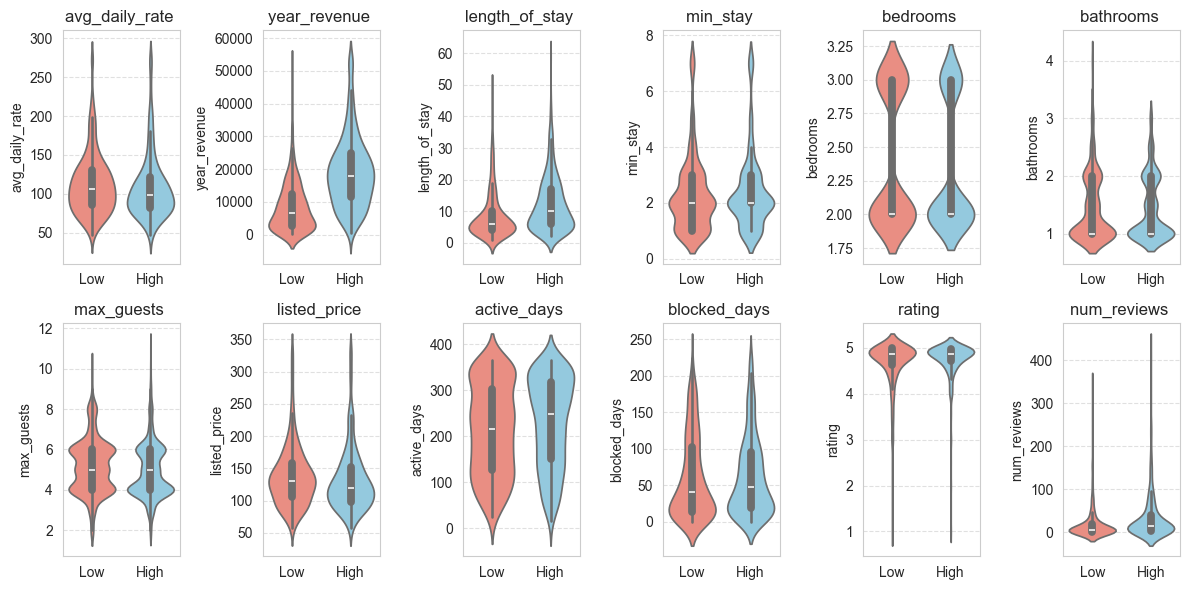

In [667]:
numerical_cols = [
    'avg_daily_rate', 'year_revenue', 'length_of_stay', 'min_stay', 'bedrooms',
    'bathrooms', 'max_guests', 'listed_price', 'active_days', 'blocked_days',
    'rating', 'num_reviews'
]
n_cols = 6
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.violinplot(x='occupancy_group', y=col, data=data, ax=axes[i], hue='occupancy_group', palette=['salmon', 'skyblue'], legend=False)
    axes[i].set_title(f'{col} ')
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)
    axes[i].grid(True, axis='y', linestyle='--', alpha=0.6)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Higher occupancy is associated with
- lower average daily rate
- higher active days (i.e listings)
- higher length of stays
- less bedrooms
- lower maximum guests
- lower listed price
- higher number of reviews

There does not appear to be any significant difference between 2 and 3 bedroom properties or number of bathrooms.

### **Correlation**


#### Data Pre-processing

In [668]:
data_encoded = data.copy()

In [669]:
from sklearn import preprocessing

for x in data_encoded.columns:
    if data_encoded[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder() # encoding
        lbl.fit(list(data_encoded[x].values)) # fitting the model
        data_encoded[x] = lbl.transform(list(data_encoded[x].values)) # transforming into various integer codes

### Heatmaps

<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables with Occupancy'}>

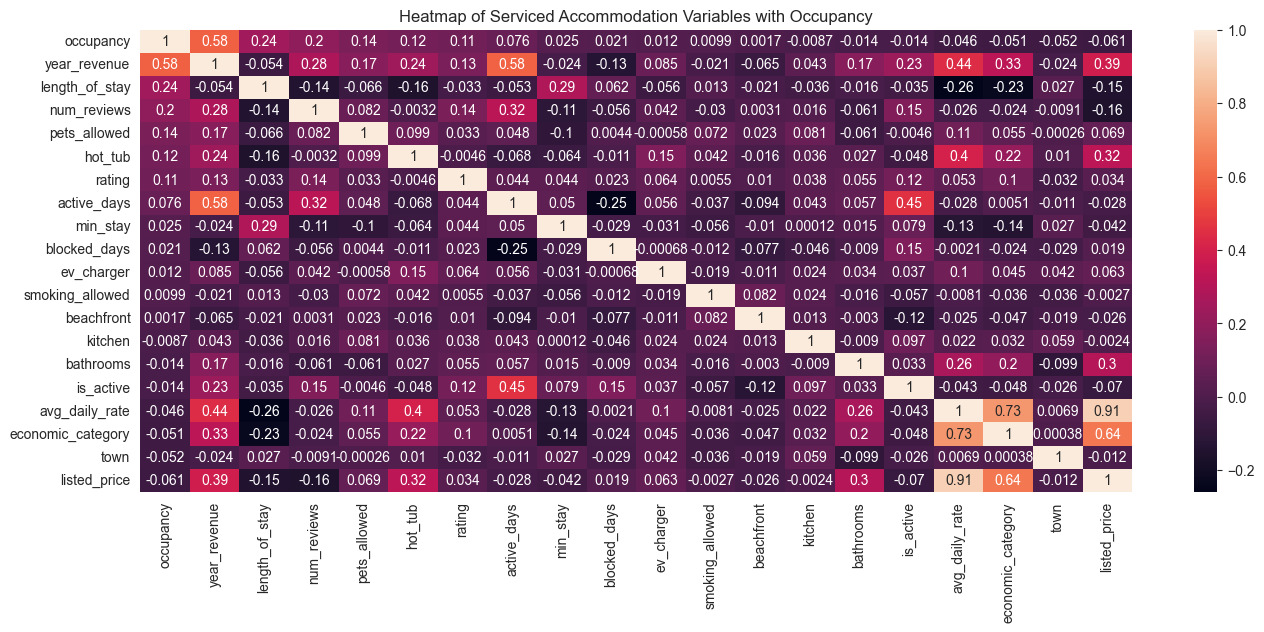

In [672]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables with Occupancy')


#Quality correlation matrix

k =20  # number of variables for heatmap # want to just pick out the top 12 
cols = data_encoded.corr().nlargest(k, 'occupancy')['occupancy'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Occupancy: the features that appear to be the most correlated are  number of reviews and length of stay


<Axes: title={'center': 'Heatmap of Serviced Accommodation Variables vs Revenue'}>

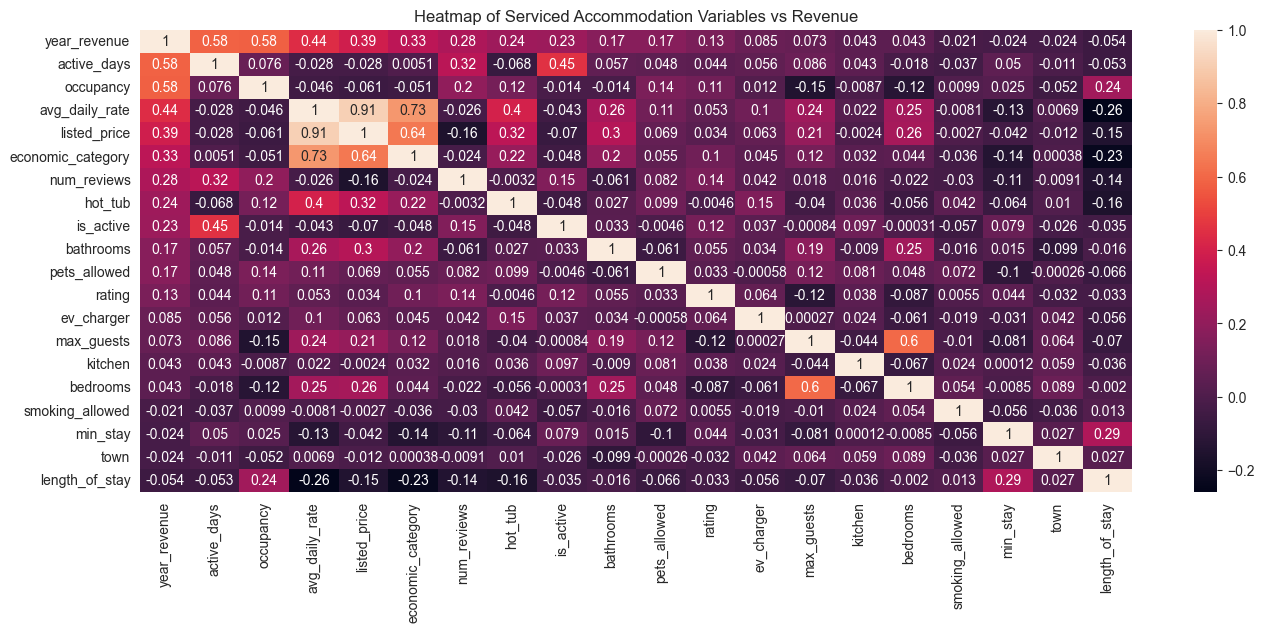

In [673]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
plt.title('Heatmap of Serviced Accommodation Variables vs Revenue')


#Quality correlation matrix

k =20  # number of variables for heatmap # want to just pick out the top 12 
cols = data_encoded.corr().nlargest(k, 'year_revenue')['year_revenue'].index  # method
cm = data_encoded[cols].corr()

sns.heatmap(cm, annot=True)

Annual revenue: Highest correlation occus with the number of active days listed, average daily rate and listed price, economic category  and number of reviews. 